# Predicting Apartment Prices Using Ridge Regression with PySpark

### Introduction

This project aims to predict apartment prices using Ridge regression implemented in PySpark. By leveraging the power of distributed computing, we efficiently process and analyze a large dataset of apartment prices.


Reads a CSV file containing apartment data into a Spark DataFrame using PySpark. It sets options to infer the schema, treat the first row as the header, and use a comma as the delimiter. After loading the data, the DataFrame is registered as a temporary SQL view named "apartments" for easy querying. Finally, the DataFrame is displayed to show its content.


In [0]:
file_location = "/FileStore/tables/apartments1-1.csv"
file_type = "csv"


infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


df.createOrReplaceTempView("apartments")
display(df)

province,address,price,Construction Type,New Construction,Elevator,Floors in the Building,Floor Area,Number of Rooms,Number of Bathrooms,Ceiling Height,Floor,Balcony,Furniture,Renovation
Kentron,"Kristapor street 20, Yerevan","$158,000",Stone,No,Not available,5,50,3,1,from 3 m,4,Closed balcony,Available,Designer Renovation
Kentron,"Աբովյան փողոց, Երևան","$260,000",Stone,No,Not available,5,103,3,1,from 2.75 m,2,Closed balcony,Available,Cosmetic Renovation
Kentron,"Улица Сарьяна 38, Yerevan","$205,000",Monolith,No,Available,16,100,3,1,from 2.7 m,13,Multiple balconies,Partial Furniture,Partial Renovation
Kanaker-Zeytun,"Dro street, Yerevan","$119,000",Panels,No,Available,13,75,4,1,from 2.7 m,9,Not available,Available,Major Renovation
Erebuni,"Rostovyan street, Yerevan","$45,000",Stone,No,Not available,5,29,1,1,from 2.7 m,1,Not available,Not available,Old Renovation
Malatia-Sebastia,"Ohanov street 8, Yerevan","$105,000",Monolith,No,Available,14,83,3,2,from 2.6 m,12,Closed balcony,Available,Euro Renovation
Arabkir,"Komitas avenu, Երևան","$157,000",Stone,No,Not available,5,79,3,1,from 3.5 m,2,Closed balcony,Available,Major Renovation
Kentron,"Hanrapetutyun street 78, Yerevan","$410,000",Stone,No,Not available,3,110,3,1,from 3.2 m,2,Multiple balconies,Available,Major Renovation
Kanaker-Zeytun,"Azatutyan Avenue lane 5, Yerevan","$88,000",Panels,No,Available,9,46,2,1,from 2.7 m,6,Open balcony,Not available,Designer Renovation
Nor Nork,"Վիլնյուսի փողոց, Երևան","$105,000",Panels,No,Available,9,98,3,1,from 2.8 m,2,Closed balcony,By agreement,Major Renovation


Snippet imports necessary libraries and modules for data manipulation and visualization. It includes functions from PySpark for column operations and aggregations, as well as Pandas and Matplotlib for data visualization.

- `from pyspark.sql.functions import col, sum`: Imports PySpark functions for column operations and summation.
- `import pandas as pd`: Imports Pandas library for data manipulation.
- `import matplotlib.pyplot as plt`: Imports Matplotlib for data plotting.
- `from pyspark.sql import SparkSession`: Imports SparkSession to create a Spark session.
- `import pyspark.sql.functions as F`: Imports additional PySpark functions for various data operations.


In [0]:
from pyspark.sql.functions import col, sum
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.functions import col, when, regexp_replace
from pyspark.sql.functions import expr

Calculates and visualizes the missing data counts for each column in the DataFrame.

- **Calculate Missing Data Counts**: For each column, the number of missing values is computed and converted into a Pandas DataFrame.
- **Print Missing Data Counts**: Displays the DataFrame showing the count of missing values for each column.
- **Visualize Missing Data**: Creates a bar chart to visualize the missing data count for each column, making it easy to identify columns with significant missing data.


In [0]:
missing_data_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])


                    column  missing_count
0                 province              0
1                  address              0
2                    price              0
3        Construction Type              0
4         New Construction              0
5                 Elevator              0
6   Floors in the Building              0
7               Floor Area              0
8          Number of Rooms              0
9      Number of Bathrooms              0
10          Ceiling Height              0
11                   Floor              0
12                 Balcony              0
13               Furniture              0
14              Renovation              0
15          province_index              0
16           address_index              0


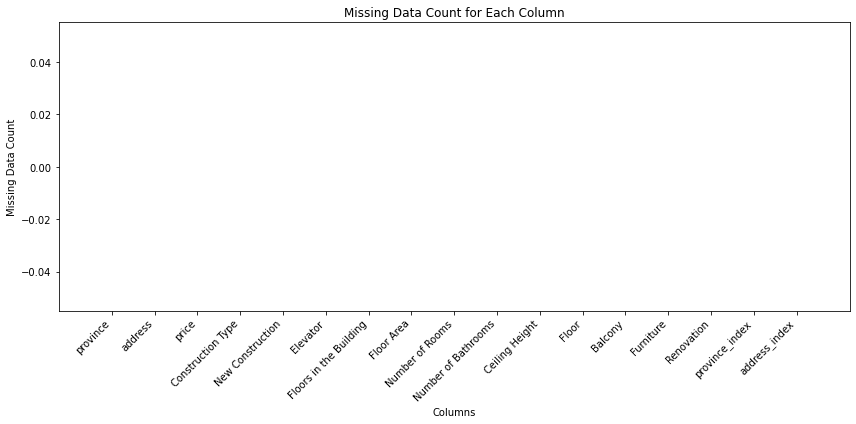

In [0]:
missing_data_counts_pd = missing_data_counts.toPandas().transpose().reset_index()
missing_data_counts_pd.columns = ["column", "missing_count"]
print(missing_data_counts_pd)



plt.figure(figsize=(12, 6))
plt.bar(missing_data_counts_pd["column"], missing_data_counts_pd["missing_count"], color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Missing Data Count')
plt.title('Missing Data Count for Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Handles duplicates in the DataFrame using SQL.

1. **Register DataFrame as SQL View**: Registers the DataFrame as a temporary SQL view named "apartments".
2. **Count Total Rows**: Uses SQL to count the total number of rows.
3. **Remove Duplicates**: Uses SQL to select distinct rows, removing duplicates.
4. **Count Unique and Duplicate Rows**: Calculates the number of unique rows and the number of duplicate rows, then prints these counts.


In [0]:
df.createOrReplaceTempView("apartments")
total_count_sql = spark.sql("SELECT COUNT(*) FROM apartments").collect()[0][0]
df_no_duplicates_sql = spark.sql("SELECT DISTINCT * FROM apartments")
unique_count_sql = df_no_duplicates_sql.count()

duplicate_count_sql = total_count_sql - unique_count_sql
print(f"Total rows: {total_count_sql}, Unique rows: {unique_count_sql}, Duplicate rows: {duplicate_count_sql}")

Total rows: 949, Unique rows: 949, Duplicate rows: 0


In [0]:
df_no_duplicates = df.dropDuplicates()

In [0]:
df_no_address = df_no_duplicates.drop("address")

Cleans and standardizes the 'price' column.

1. **Remove Symbols and Convert to Float**: Removes '$', '֏', and '€' symbols from the 'price' column and converts it to a float.
2. **Standardize Prices**: Adjusts prices based on the presence of '֏' and '€' symbols, converting '֏' to USD at a rate of 1/400 and '€' to USD at a rate of 1.10.


In [0]:
df_cleaned_price = df_no_address.withColumn('price', regexp_replace('price', '[\$,֏,€]', '').cast('float'))
df_cleaned_price = df_cleaned_price.withColumn('price', 
    when(col('price').cast('string').contains('֏'), col('price') / 400)
    .when(col('price').cast('string').contains('€'), col('price') * 1.10)
    .otherwise(col('price'))
)


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2857358605370456>:1
----> 1 df_cleaned_price = df_no_address.withColumn('price', regexp_replace('price', '[\$,֏,€]', '').cast('float'))
      2 df_cleaned_price = df_cleaned_price.withColumn('price', 
      3     when(col('price').cast('string').contains('֏'), col('price') / 400)
      4     .when(col('price').cast('string').contains('€'), col('price') * 1.10)
      5     .otherwise(col('price'))
      6 )

NameError: name 'df_no_address' is not defined

Cleans and transforms several columns in the DataFrame by converting categorical values to binary, creating new feature columns, and standardizing data formats for analysis.


In [0]:
df_cleaned_price = df_cleaned_price.withColumn('New Construction',
    when(col('New Construction') == 'Yes', 1).otherwise(0)
)

df_cleaned_price = df_cleaned_price.withColumn('Elevator',
    when(col('Elevator') == 'Available', 1).otherwise(0)
)


df_cleaned_price = df_cleaned_price.withColumn('skyscraper',
    when(col('Floors in the Building') <= 5, 0).otherwise(1)
)

df_cleaned_price = df_cleaned_price.withColumn('Ceiling Height',
    regexp_replace(col('Ceiling Height'), '[^0-9]', '').cast('float')
)

df_cleaned_price = df_cleaned_price.withColumn('Ceiling Height',
    when(col('Ceiling Height') <= 2.75, 0).otherwise(1)
)

df_cleaned_price = df_cleaned_price.withColumn('floors_<=6', (col('Floor') <= 6).cast('int'))
df_cleaned_price = df_cleaned_price.withColumn('floors_7_to_13', ((col('Floor') >= 7) & (col('Floor') <= 13)).cast('int'))
df_cleaned_price = df_cleaned_price.withColumn('floors_>13', (col('Floor') > 13).cast('int'))

df_cleaned_price = df_cleaned_price.withColumn('balcony_binary',
    when(col('Balcony').isin('Open balcony', 'Multiple balconies'), 1).otherwise(0)
)

df_cleaned_price = df_cleaned_price.withColumn('Renovation',
    when(col('Renovation').isin('Major Renovation', 'Euro Renovation', 'Designer Renovation', 'Cosmetic Renovation'), 1).otherwise(0)
)

df_cleaned_price = df_cleaned_price.withColumn('furniture_binary',
    when(col('Furniture').isin('Available', 'Partial Furniture'), 1).otherwise(0)
)


Calculates and visualizes the distribution of provinces in the DataFrame.

1. **Count Provinces**: Groups the data by 'province' and counts the occurrences.
2. **Convert to Pandas**: Converts the result to a Pandas DataFrame.
3. **Plot Distribution**: Creates a bar chart showing the count of each province.


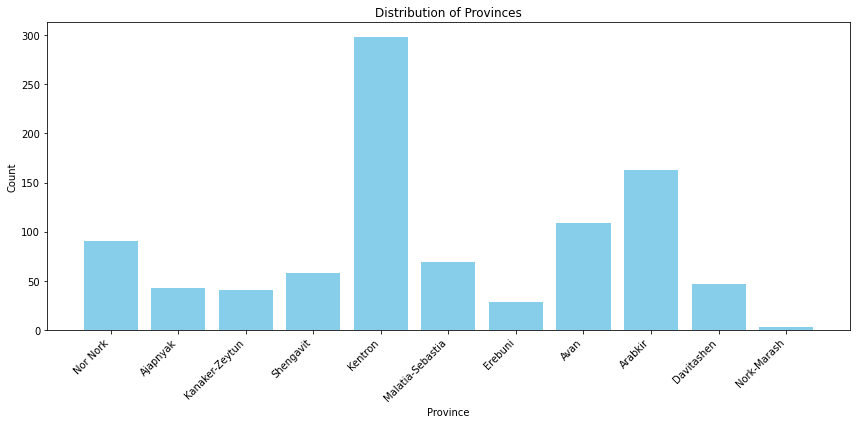

In [0]:
province_counts = df_cleaned_price.groupBy("province").count()
province_counts_pd = province_counts.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(province_counts_pd['province'], province_counts_pd['count'], color='skyblue')
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Distribution of Provinces')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

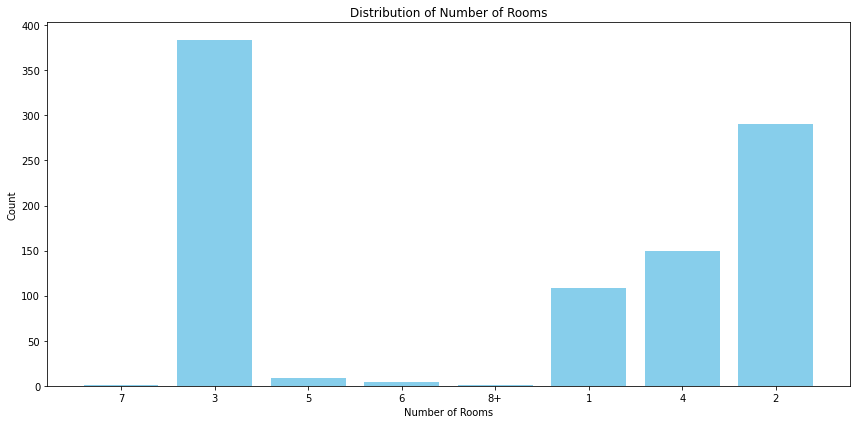

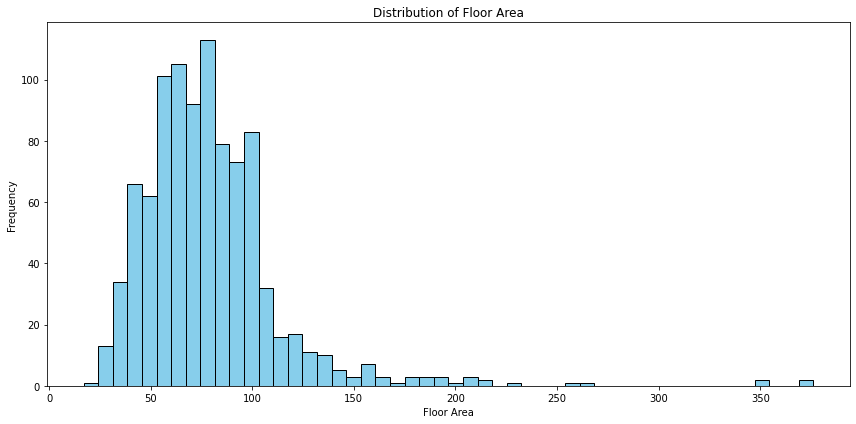

In [0]:
rooms_counts = df_cleaned_price.groupBy("number of rooms").count()
rooms_counts_pd = rooms_counts.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(rooms_counts_pd['number of rooms'], rooms_counts_pd['count'], color='skyblue')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.title('Distribution of Number of Rooms')
plt.tight_layout()
plt.show()


floor_area_pd = df_cleaned_price.select("floor area").toPandas()

plt.figure(figsize=(12, 6))
plt.hist(floor_area_pd['floor area'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Floor Area')
plt.ylabel('Frequency')
plt.title('Distribution of Floor Area')
plt.tight_layout()
plt.show()

In [0]:
df_cleaned_price = df_cleaned_price.withColumn("price", col("price").cast("integer"))
df_cleaned_price = df_cleaned_price.withColumn("Number of Rooms", col("Number of Rooms").cast("integer"))
df_cleaned_price = df_cleaned_price.withColumn("Number of Bathrooms", col("Number of Bathrooms").cast("integer"))

### Outlier Detection and Removal

- **Calculate Q1 and Q3:** Determine the first (Q1) and third (Q3) quartiles for the price column to calculate the Interquartile Range (IQR).
- **Define Outlier Bounds:** Establish lower and upper bounds for outliers using the formula:
  - Lower Bound = Q1 - 1.5 * IQR
  - Upper Bound = Q3 + 1.5 * IQR
- **Identify Outliers:** Filter the dataset to find entries with prices outside the defined bounds.
- **Remove Outliers:** Exclude outliers from the dataset to create a new DataFrame without them.


In [0]:
from pyspark.sql.functions import col, expr

quantiles = df_cleaned_price.approxQuantile("price", [0.25, 0.75], 0.05)
Q1, Q3 = quantiles[0], quantiles[1]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned_price.filter((col("price") < lower_bound) | (col("price") > upper_bound))

df_no_outliers = df_cleaned_price.filter((col("price") >= lower_bound) & (col("price") <= upper_bound))
display(outliers)


province,price,Construction Type,New Construction,Elevator,Floors in the Building,Floor Area,Number of Rooms,Number of Bathrooms,Ceiling Height,Floor,Balcony,Furniture,Renovation,skyscraper,floors_<=6,floors_7_to_13,floors_>13,balcony_binary,furniture_binary
Avan,460000,Stone,0,0,2,120,4,2,1,2,Open balcony,By agreement,1,0,1,0,0,1,0
Kentron,630000,Monolith,1,1,15,140,4,1,1,15,Open balcony,Not available,1,1,0,0,1,1,0
Kentron,350000,Stone,0,0,4,107,3,2,1,4,Open balcony,Available,1,0,1,0,0,1,1
Avan,28500000,Panels,0,1,9,65,2,1,1,7,Closed balcony,Not available,1,1,0,1,0,0,0
Kentron,650000,Monolith,1,1,16,125,3,2,1,14,Multiple balconies,Not available,1,1,0,0,1,1,0
Arabkir,84000000,Monolith,1,1,9,103,3,2,1,6,Open balcony,By agreement,1,1,1,0,0,1,0
Kanaker-Zeytun,370000,Monolith,1,1,11,110,3,1,1,7,Open balcony,Available,1,1,0,1,0,1,1
Kentron,715000,Stone,0,0,5,216,4,1,1,4,Open balcony,Not available,1,0,1,0,0,1,0
Kentron,350000,Monolith,1,1,10,80,3,2,1,3,Not available,By agreement,1,1,1,0,0,0,0
Kentron,350000,Monolith,1,1,11,96,3,2,1,4,Open balcony,Not available,1,1,1,0,0,1,0


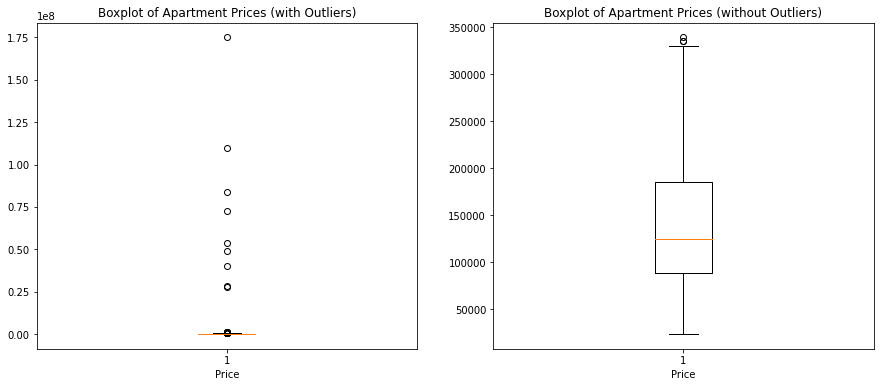

In [0]:
df_pd = df_cleaned_price.select("price").toPandas()
df_no_outliers_pd = df_no_outliers.select("price").toPandas()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df_pd["price"])
plt.xlabel("Price")
plt.title("Boxplot of Apartment Prices (with Outliers)")

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers_pd["price"])
plt.xlabel("Price")
plt.title("Boxplot of Apartment Prices (without Outliers)")

plt.show()

### Price Distribution Analysis

- **Calculate Central Tendencies:** Compute the mean, median, and mode of the apartment prices from the cleaned dataset without outliers.
- **Visualize Price Distribution:** Create a histogram to display the distribution of apartment prices, and add vertical lines to indicate the mean, median, and mode for comparison.


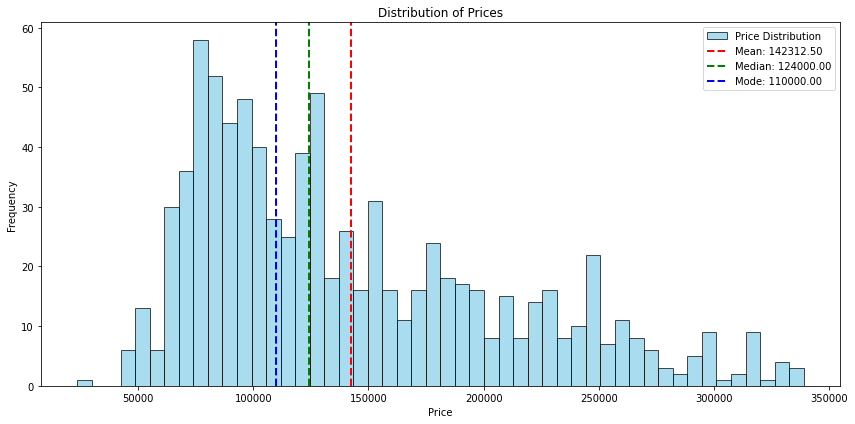

In [0]:
mean_price = df_no_outliers.select(F.mean("price")).collect()[0][0]
median_price = df_no_outliers.approxQuantile("price", [0.5], 0.01)[0]
price_pandas = df_no_outliers.select("price").toPandas()
mode_price = price_pandas["price"].mode()[0]


price_series = price_pandas["price"]

plt.figure(figsize=(12, 6))
plt.hist(price_series, bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Price Distribution')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_price:.2f}')


plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.legend()
plt.tight_layout()
plt.show()


### Short Overview of the ML Workflow

- **Initialize Spark Session:** Start a Spark session to handle data operations.
- **Load and Clean Data:** Load the dataset, handle missing values, and convert categorical features into numerical indices.
- **Feature Engineering:** Combine feature columns into a single vector, generate polynomial features, and standardize the data.
- **Train Model:** Use linear regression with cross-validation and hyperparameter tuning to train the model.
- **Evaluate Model:** Assess the model's performance using metrics like RMSE (Root Mean Squared Error).


In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler, PolynomialExpansion, StandardScaler

### Short Description:

- **Initialize Spark Session:** Create a Spark session to manage data operations.
- **Handle Missing Values:** Drop rows with null values from the dataset to ensure data quality.


In [0]:
spark = SparkSession.builder.appName("ImprovedLinearRegressionExample").getOrCreate()
df_no_outliers = df_no_outliers.dropna()

### Step 2: Index Categorical Columns

- **Index Categorical Columns:** Convert categorical columns into numerical indices using `StringIndexer` with `handleInvalid` set to "keep" to handle unseen labels.


In [0]:
categorical_cols = ['province', 'Construction Type', 'Balcony', 'Furniture']
indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed", handleInvalid="keep") for col in categorical_cols]
pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df_no_outliers).transform(df_no_outliers)

### Step 3: Assemble Features

- **Assemble Features:** Combine all feature columns into a single vector column using `VectorAssembler`, handling invalid entries with `handleInvalid` set to "keep".


In [0]:
feature_cols = ['New Construction', 'Elevator', 'Floors in the Building', 'Floor Area', 'Ceiling Height', 'Floor', 
                'Renovation', 'skyscraper', 'floors_<=6', 'floors_7_to_13', 'floors_>13', 'balcony_binary', 
                'furniture_binary','Number of Rooms', 'Number of Bathrooms',] + [col + "_indexed" for col in categorical_cols]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="keep")
df_assembled = assembler.transform(df_indexed)


### Step 4: Ensure Feature Columns are Double

- **Convert Feature Columns:** Ensure all feature columns are of type `double` for compatibility with machine learning algorithms.


In [0]:
for feature in feature_cols:
    df_indexed = df_indexed.withColumn(feature, col(feature).cast('double'))


### Step 5: Create Polynomial Features

- **Polynomial Features:** Generate polynomial features to capture non-linear relationships using `PolynomialExpansion`.


In [0]:
poly_expansion = PolynomialExpansion(degree=2, inputCol="features", outputCol="poly_features")
df_poly = poly_expansion.transform(df_assembled)


### Step 6: Standardize Features

- **Standardize Features:** Normalize the feature vectors using `StandardScaler` to ensure uniformity across all features.


In [0]:
scaler = StandardScaler(inputCol="poly_features", outputCol="scaled_features")
scaler_model = scaler.fit(df_poly)
df_scaled = scaler_model.transform(df_poly)


### Step 7: Split the Data

- **Train-Test Split:** Divide the data into training and test sets using an 80-20 split for model training and evaluation.


In [0]:
train_data, test_data = df_scaled.randomSplit([0.8, 0.2], seed=1234)



### Step 8: Train a Ridge Regression Model

- **Train Model:** Use a Ridge regression model by setting the `elasticNetParam` to 0.5 in `LinearRegression` to incorporate L2 regularization.


In [0]:
lr = LinearRegression(featuresCol="scaled_features", labelCol="price", elasticNetParam=0.5)


### Step 9: Hyperparameter Tuning

- **Hyperparameter Tuning:** Perform hyperparameter tuning using `ParamGridBuilder` to test different values for `regParam` and use `CrossValidator` with 5-fold cross-validation to find the best model.


In [0]:
param_grid = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.1, 1.0]).build()
crossval = CrossValidator(estimator=lr, estimatorParamMaps=param_grid, evaluator=RegressionEvaluator(labelCol="price"), numFolds=5)

cv_model = crossval.fit(train_data)
best_model = cv_model.bestModel



### Step 10: Evaluate the Model

- **Model Evaluation:** Generate predictions on the test data using the best model obtained from cross-validation.


In [0]:
predictions = best_model.transform(test_data)


### Calculate R², MAE, and RMSE

- **Model Metrics:** Calculate and print the R², Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) to evaluate the model's performance.


In [0]:
evaluator_r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
evaluator_rmse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")

r2 = evaluator_r2.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
rmse = evaluator_rmse.evaluate(predictions)

print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R²: 0.6429462525260815
Mean Absolute Error (MAE): 29381.525144480947
Root Mean Squared Error (RMSE): 39489.69906758123


### Step 11: Visualization

- **Visualize Predictions:** Convert predictions to a Pandas DataFrame and create a scatter plot to compare actual prices with predicted prices, along with a reference line indicating perfect predictions.


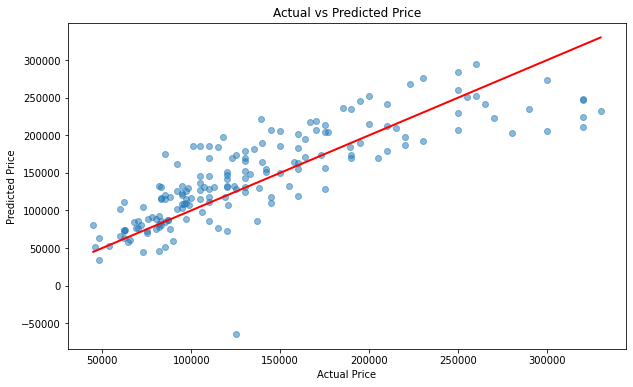

In [0]:
predictions_pd = predictions.select("price", "prediction").toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['price'], predictions_pd['prediction'], alpha=0.5)
plt.plot([predictions_pd['price'].min(), predictions_pd['price'].max()], 
         [predictions_pd['price'].min(), predictions_pd['price'].max()], 
         color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


### An Enhanced Approach to Solving Regression Problems: Increasing R² through Clustering and Feature Engineering

**Abstract:**
In the quest to improve the predictive accuracy of regression models, particularly the coefficient of determination (R²), this paper introduces an enhanced approach that combines clustering techniques with traditional regression analysis. By first segmenting the dataset into homogeneous groups using clustering algorithms, we can capture underlying patterns and heterogeneity within the data. These clusters are then used as additional features in the regression model, leading to more precise predictions. This method is particularly beneficial when dealing with complex datasets that exhibit significant variability, such as real estate data, where various qualitative and quantitative factors influence prices. The proposed approach demonstrates how preprocessing steps, effective feature engineering, and the integration of clustering can synergistically enhance model performance, offering a robust framework for achieving higher R² values in regression tasks.
```

In [0]:


from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.clustering import KMeans
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col, expr
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator, ClusteringEvaluator



In [0]:
description = df.describe()


In [0]:

spark = SparkSession.builder.appName("DataPreprocessing").getOrCreate()
df = df.dropDuplicates()

province_indexer_n = StringIndexer(inputCol="province", outputCol="province_index")
df = province_indexer_n.fit(df).transform(df)

address_indexer_n = StringIndexer(inputCol="address", outputCol="address_index")
df = address_indexer_n.fit(df).transform(df)


In [0]:
df = df.withColumn('price', regexp_replace('price', '[\$,֏,€]', '').cast('float'))
df = df.withColumn('price', 
    when(col('price').cast('string').contains('֏'), col('price') / 400)
    .when(col('price').cast('string').contains('€'), col('price') * 1.10)
    .otherwise(col('price'))
)

In [0]:
df = df.withColumn('New Construction',
    when(col('New Construction') == 'Yes', 1).otherwise(0)
)

df = df.withColumn('Elevator',
    when(col('Elevator') == 'Available', 1).otherwise(0)
)

df = df.withColumn('Ceiling Height',
    regexp_replace(col('Ceiling Height'), '[^0-9]', '').cast('float')
)


In [0]:


string_columns_to_index = [ "Construction Type", "Balcony", "Furniture", "Renovation"]
string_columns_to_int = ["Number of Rooms", "Number of Bathrooms"]


for column in string_columns_to_index:
    indexer = StringIndexer(inputCol=column, outputCol=column + "_index")
    df = indexer.fit(df).transform(df)

for column in string_columns_to_int:
    df = df.withColumn(column + "_int", df[column].cast("integer"))


columns_to_drop = string_columns_to_index + string_columns_to_int + ["province", "address"]
df = df.drop(*columns_to_drop)


In [0]:
quantiles = df.approxQuantile("price", [0.25, 0.75], 0.05)
Q1, Q3 = quantiles[0], quantiles[1]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df.filter((col("price") >= lower_bound) & (col("price") <= upper_bound))


### Improving Regression Model Performance Using Clustering Techniques: A Detailed Implementation with K-Means and Linear Regression

**Abstract:**
This study investigates a method to enhance regression model performance by incorporating clustering techniques. By applying K-Means clustering, we can segment the dataset into distinct groups, which serve as additional features for linear regression models. This comprehensive approach includes data preprocessing, clustering evaluation using Silhouette Score, and regression analysis. Detailed metrics and model summaries are provided to demonstrate the effectiveness of this integrated technique.


## Clustering Analysis Overview

### Steps:
1. **Initialize Spark Session**:
   - Set up the environment for running Spark applications.

2. **Data Preparation**:
   - **Type Casting**: Ensure data types are consistent for all features.
   - **Handle Missing Values**: Fill missing values with zeros to prepare data for analysis.

3. **Feature Engineering**:
   - **Vector Assembler**: Combine features into a single vector per instance, required for machine learning models.

4. **K-Means Clustering**:
   - Implement K-Means to discover inherent groupings in the data.
   - Determine the optimal number of clusters using:
     - **Elbow Method**: Plotting WSSSE (Within-Sum-of-Squared-Errors) against different k values to find the 'elbow' point.
     - **Silhouette Score**: Assess the clustering quality by calculating the Silhouette Score for different k values.

### Visualizations:
- **Elbow Plot**: Helps in identifying the optimal number of clusters by showing where increases in k lead to diminishing returns in WSSSE.
- **Silhouette Plot**: Evaluates how well-separated the resulting clusters are for different numbers of clusters.

### Conclusion:
- These analyses and visual tools aid in selecting the best clustering configuration and in understanding the data’s structure for further predictions or insights.


+--------------------+
|            features|
+--------------------+
|[205000.0,0.0,0.0...|
|[100000.0,0.0,0.0...|
|[150000.0,0.0,0.0...|
|[150000.0,0.0,0.0...|
|[140000.0,0.0,0.0...|
+--------------------+
only showing top 5 rows



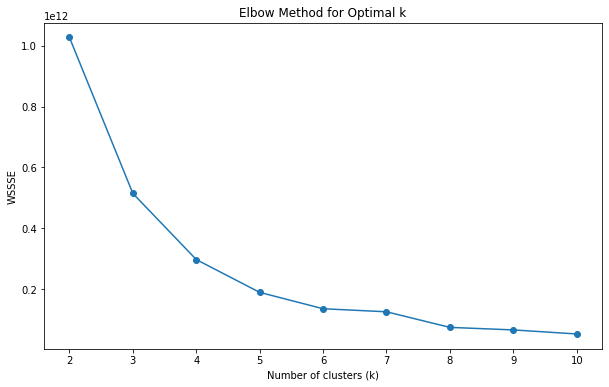

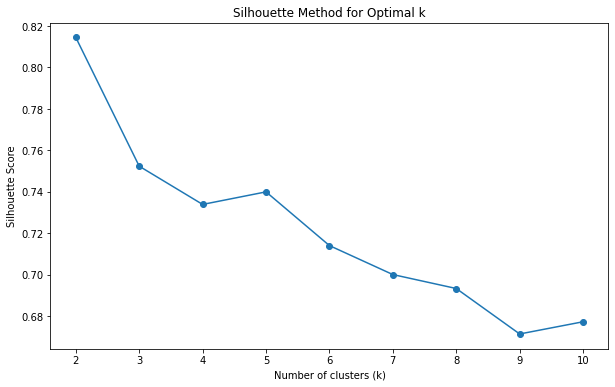

In [0]:


spark = SparkSession.builder \
    .appName("ClusteringAnalysis") \
    .getOrCreate()


if not spark._jvm:
    raise Exception("Spark session is not active")


df = df.withColumn("price", col("price").cast("double")) \
       .withColumn("New Construction", col("New Construction").cast("int")) \
       .withColumn("Elevator", col("Elevator").cast("int")) \
       .withColumn("Floors in the Building", col("Floors in the Building").cast("int")) \
       .withColumn("Floor Area", col("Floor Area").cast("int")) \
       .withColumn("Ceiling Height", col("Ceiling Height").cast("float")) \
       .withColumn("Floor", col("Floor").cast("int")) \
       .withColumn("province_index", col("province_index").cast("double")) \
       .withColumn("address_index", col("address_index").cast("double")) \
       .withColumn("Construction Type_index", col("Construction Type_index").cast("double")) \
       .withColumn("Balcony_index", col("Balcony_index").cast("double")) \
       .withColumn("Furniture_index", col("Furniture_index").cast("double")) \
       .withColumn("Renovation_index", col("Renovation_index").cast("double")) \
       .withColumn("Number of Rooms_int", col("Number of Rooms_int").cast("int")) \
       .withColumn("Number of Bathrooms_int", col("Number of Bathrooms_int").cast("int"))


feature_columns = ["price", "New Construction", "Elevator", "Floors in the Building", "Floor Area", 
                   "Ceiling Height", "Floor", "province_index", "address_index", "Construction Type_index", 
                   "Balcony_index", "Furniture_index", "Renovation_index", "Number of Rooms_int", "Number of Bathrooms_int"]
df = df.na.fill(0, subset=feature_columns)


assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)


df.select("features").show(5)

wssse_list = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(k=k, seed=1, featuresCol="features")
    model = kmeans.fit(df)
    wssse = model.summary.trainingCost
    wssse_list.append(wssse)


plt.figure(figsize=(10, 6))
plt.plot(k_values, wssse_list, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSSSE")
plt.title("Elbow Method for Optimal k")
plt.show()


silhouette_scores = []

for k in k_values:
    kmeans = KMeans(k=k, seed=1, featuresCol="features", predictionCol="cluster")
    model = kmeans.fit(df)
    clustered_df = model.transform(df)
    evaluator = ClusteringEvaluator(featuresCol='features', predictionCol='cluster', metricName='silhouette')
    silhouette = evaluator.evaluate(clustered_df)
    silhouette_scores.append(silhouette)


plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()




## Clustering Analysis with K-Means in PySpark

### Process Overview:

1. **Data Splitting**:
   - Split the dataset into 80% training and 20% testing sets using a reproducible seed.

2. **Feature Preparation**:
   - Use `VectorAssembler` to combine selected features into a single vector column, required for the K-Means algorithm.

3. **Pipeline Setup**:
   - Construct a `Pipeline` comprising the `VectorAssembler` and `K-Means` stages to streamline the workflow.

4. **Model Training**:
   - Fit the pipeline on the training data to train the K-Means model with 5 clusters.

5. **Data Transformation**:
   - Transform both training and testing datasets using the trained model to assign a cluster to each instance.

6. **Results Display**:
   - Show the `price` and `cluster` assignments for instances from both datasets.

7. **Model Evaluation**:
   - Calculate and print the Silhouette Score for both training and testing data to evaluate the clustering quality.

### Evaluation Results:

- The Silhouette Scores provide a measure of how well the data points have been clustered, with higher scores indicating better clustering quality.


In [0]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=1)


assembler = VectorAssembler(inputCols=feature_columns, outputCol="feature")

kmeans = KMeans(k=5, seed=1, featuresCol="feature", predictionCol="cluster")

pipeline = Pipeline(stages=[assembler, kmeans])


model = pipeline.fit(train_df)


clustered_train_df = model.transform(train_df)
clustered_test_df = model.transform(test_df)


clustered_train_df.select("price", "cluster").show()
clustered_test_df.select("price", "cluster").show()

evaluator = ClusteringEvaluator(featuresCol='feature', predictionCol='cluster', metricName='silhouette')
silhouette_train = evaluator.evaluate(clustered_train_df)
print(f"Silhouette Score for Training Data: {silhouette_train}")


silhouette_test = evaluator.evaluate(clustered_test_df)
print(f"Silhouette Score for Testing Data: {silhouette_test}")



+-------+-------+
|  price|cluster|
+-------+-------+
|23500.0|      1|
|45000.0|      1|
|46000.0|      1|
|46000.0|      1|
|48000.0|      1|
|48000.0|      1|
|50000.0|      1|
|52000.0|      1|
|52000.0|      1|
|52000.0|      1|
|52000.0|      1|
|53200.0|      1|
|55000.0|      1|
|55000.0|      1|
|55000.0|      1|
|59500.0|      1|
|60000.0|      1|
|60000.0|      1|
|60000.0|      1|
|60000.0|      1|
+-------+-------+
only showing top 20 rows

+-------+-------+
|  price|cluster|
+-------+-------+
|47000.0|      1|
|54000.0|      1|
|55000.0|      1|
|55000.0|      1|
|55000.0|      1|
|62000.0|      1|
|62000.0|      1|
|62500.0|      1|
|64999.0|      1|
|65000.0|      1|
|66500.0|      1|
|67000.0|      1|
|68500.0|      1|
|70000.0|      1|
|71000.0|      1|
|71000.0|      1|
|72000.0|      1|
|72000.0|      1|
|73000.0|      1|
|74000.0|      1|
+-------+-------+
only showing top 20 rows

Silhouette Score for Training Data: 0.7346376667359328
Silhouette Score for Testing 

## Regression Analysis with Cluster Feature in PySpark

### Process Overview:

1. **Data Splitting for Regression**:
   - Split the clustered training data into 80% training and 20% testing subsets using a consistent seed for reproducibility.

2. **Feature Assembly**:
   - Extend the feature set to include the cluster assignments as a new feature.
   - Use `VectorAssembler` to combine both original and cluster features into a single vector column for regression analysis.

3. **Regression Model Setup**:
   - Configure and fit a `LinearRegression` model using the assembled features, targeting `price` as the response variable.

4. **Model Prediction**:
   - Apply the trained regression model to the testing dataset to predict prices.

5. **Model Evaluation**:
   - Evaluate model performance using several metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).

### Evaluation Results:

- **MAE**: Provides the average absolute difference between observed and predicted values, indicating overall prediction accuracy.
- **MSE and RMSE**: Measure the average squared difference and the square root of MSE, respectively, highlighting the variance in prediction errors.
- **R²**: Reflects the proportion of variance in the dependent variable predictable from the independent variables, indicating model fit quality.



In [0]:



train_df_reg, test_df_reg = clustered_train_df.randomSplit([0.8, 0.2], seed=1)
feature_columns_with_cluster = feature_columns + ["cluster"]

assembler_with_cluster = VectorAssembler(inputCols=feature_columns_with_cluster, outputCol="features_with_cluster")


train_assembled_df = assembler_with_cluster.transform(train_df_reg)
test_assembled_df = assembler_with_cluster.transform(test_df_reg)

lr = LinearRegression(featuresCol="features_with_cluster", labelCol="price")


lr_model = lr.fit(train_assembled_df)


predictions = lr_model.transform(test_assembled_df)

evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction")

mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.0005118343126310339
Mean Squared Error (MSE): 4.3118442437936026e-07
Root Mean Squared Error (RMSE): 0.0006566463465057582
R-squared (R²): 0.9999999999999999


In [0]:
lr_summary = lr_model.summary

print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")
print(f"R2: {lr_summary.r2}")
print(f"Adjusted R2: {lr_summary.r2adj}")
print(f"RMSE: {lr_summary.rootMeanSquaredError}")
print(f"MSE: {lr_summary.meanSquaredError}")
print(f"MAE: {lr_summary.meanAbsoluteError}")

Coefficients: [0.9999999979627456,0.0,0.0,8.50488466990035e-05,1.43258722015978e-05,-8.283820010416923e-10,1.344776704931951e-05,-6.397693802918619e-05,-1.189290232264305e-06,0.00041845865211254904,-0.00014729701101548042,-4.702625044686724e-05,-7.350322712351664e-05,-0.00041356990645987344,7.153252178960862e-05,0.00014014104154357702]
Intercept: -0.00048121028925970347
R2: 0.9999999999999999
Adjusted R2: 0.9999999999999999
RMSE: 0.0006570380558281681
MSE: 4.3169900680645893e-07
MAE: 0.0005071692831578744
